In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import sympy as sp
from scipy import linalg as la
sp.init_printing()
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('smart_ mob.csv')
df.shape

In [4]:
df

,Traffic_Light_State,Weather_Condition,Traffic_Condition,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h
0,Yellow,Clear,High,40.842.275.292.891.800,-7.370.314.869.323.040,205,4.989.343.479.610.330,8.265.277.992.850.860,0,-6.091.990.900.689.380,2,45,4.507.600.550.695.170,"195743365296003000,00%"
1,Green,Clear,High,408.311.193.987.152,-739.873.540.904.415,202,22.383.964.870.087.800,4.582.929.780.270.140,0,965.442.369.948.869,16,1,3.218.003.405.168.860,"538555351219373000,00%"
2,Green,Rain,High,4.081.954.876.392.320,-7.373.246.185.831.270,252,46.889.699.439.334.800,8.277.246.480.269.830,0,2.896.603.158.283.980,16,49,2.311.526.548.042.290,"1027747748641990000,00%"
3,Red,Fog,High,4.072.584.887.921.560,-7.398.013.411.315.870,37,573.053.642.288.215,3.769.556.743.980.880,0,-27.196.473.819.133.900,66,10,4.103.842.921.098.870,"2924327944996020000,00%"
4,Green,Clear,High,4.064.111.174.659.450,-7.382.509.533.565.380,125,9.150.745.620.777.420,7.279.990.343.468.820,0,-5.946.363.258.437.670,78,27,3.490.453.075.341.280,"2980584193833020000,00%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Yellow,Clear,Medium,4.077.760.733.932.220,-7.383.055.479.299.490,84,29.869.927.657.803.400,7.722.717.321.068.760,0,-2.806.494.464.419.900,23,35,36.256.314.693.995.600,"1156849619785020000,00%"
4996,Yellow,Snow,Medium,40.802.349.397.442.400,-7.374.322.456.150.700,34,38.433.820.927.243.500,1.917.203.101.714.660,0,2.617.610.591.629.940,73,18,47.224.591.350.730.800,"287405203210576000,00%"
4997,Yellow,Clear,Medium,4.082.135.366.815.780,-7.375.937.617.251.820,43,5.949.298.074.243.690,787.191.095.731.781,0,5.245.740.471.177.880,94,16,716.602.956.456.157,"252672455281630000,00%"
4998,Yellow,Rain,Medium,4.077.234.305.363.280,-7.383.669.765.444.560,88,25.901.119.479.397.800,6.469.071.876.160.080,0,-5.899.021.556.316.300,73,5,4.426.926.179.133.880,"2946732592278780000,00%"


In [5]:
df.dtypes

Traffic_Light_State       object
Weather_Condition         object
Traffic_Condition         object
Latitude                  object
Longitude                 object
Vehicle_Count              int64
Traffic_Speed_kmh         object
Road_Occupancy_%          object
Accident_Report            int64
Sentiment_Score           object
Ride_Sharing_Demand        int64
Parking_Availability       int64
Emission_Levels_g_km      object
Energy_Consumption_L_h    object
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Vehicle_Count,5000.0,153.9212,83.523342,10.0,80.0,156.0,226.0,299.0
Accident_Report,5000.0,0.0960,0.294621,0.0,0.0,0.0,0.0,1.0
Ride_Sharing_Demand,5000.0,50.4878,28.484426,1.0,26.0,50.0,75.0,99.0
Parking_Availability,5000.0,24.6130,14.532511,0.0,12.0,24.0,37.0,49.0


In [8]:
df['Traffic_Condition'].value_counts()

Traffic_Condition
High      3166
Medium    1475
Low        359
Name: count, dtype: int64

In [9]:
df['Weather_Condition'].value_counts()

Weather_Condition
Rain     1279
Snow     1257
Fog      1245
Clear    1219
Name: count, dtype: int64

In [10]:
df['Traffic_Light_State'].value_counts()

Traffic_Light_State
Yellow    1726
Green     1651
Red       1623
Name: count, dtype: int64

In [14]:
df['Accident_Report'].value_counts()

Accident_Report
0    4520
1     480
Name: count, dtype: int64

In [19]:
df.loc[df.Traffic_Condition=='High']

,Traffic_Light_State,Weather_Condition,Traffic_Condition,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h
0,Yellow,Clear,High,40.842.275.292.891.800,-7.370.314.869.323.040,205,4.989.343.479.610.330,8.265.277.992.850.860,0,-6.091.990.900.689.380,2,45,4.507.600.550.695.170,"195743365296003000,00%"
1,Green,Clear,High,408.311.193.987.152,-739.873.540.904.415,202,22.383.964.870.087.800,4.582.929.780.270.140,0,965.442.369.948.869,16,1,3.218.003.405.168.860,"538555351219373000,00%"
2,Green,Rain,High,4.081.954.876.392.320,-7.373.246.185.831.270,252,46.889.699.439.334.800,8.277.246.480.269.830,0,2.896.603.158.283.980,16,49,2.311.526.548.042.290,"1027747748641990000,00%"
3,Red,Fog,High,4.072.584.887.921.560,-7.398.013.411.315.870,37,573.053.642.288.215,3.769.556.743.980.880,0,-27.196.473.819.133.900,66,10,4.103.842.921.098.870,"2924327944996020000,00%"
4,Green,Clear,High,4.064.111.174.659.450,-7.382.509.533.565.380,125,9.150.745.620.777.420,7.279.990.343.468.820,0,-5.946.363.258.437.670,78,27,3.490.453.075.341.280,"2980584193833020000,00%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3161,Red,Snow,High,4.071.684.190.504.380,-7.392.822.812.034.210,213,25.481.541.746.565.700,31.141.163.254.182.000,0,9.378.491.675.222.670,11,38,583.983.089.451.182,"569543410929228000,00%"
3162,Yellow,Snow,High,4.082.149.146.131.690,-7.373.367.190.103.550,27,9.850.673.826.369.220,4.649.318.918.288.420,0,-43.040.870.332.275.300,98,45,3.661.080.524.293.850,"1113193622590980000,00%"
3163,Green,Fog,High,40.714.674.826.747.100,-7.393.566.514.045.960,257,567.687.709.517.337,8.648.186.397.134.340,0,-6.481.765.238.534.890,5,42,16.372.165.624.547.300,"1850009163193990000,00%"
3164,Yellow,Snow,High,40.825.506.642.940.400,-7.396.710.138.266.600,217,20.316.524.511.071,8.330.155.195.244.370,0,-42.544.205.737.460.200,96,41,5.090.833.833.609.670,"1708873536669430000,00%"


In [20]:
df.iloc[:10,[0,8,13]]

,Traffic_Light_State,Accident_Report,Energy_Consumption_L_h
0,Yellow,0,"195743365296003000,00%"
1,Green,0,"538555351219373000,00%"
2,Green,0,"1027747748641990000,00%"
3,Red,0,"2924327944996020000,00%"
4,Green,0,"2980584193833020000,00%"
5,Green,0,"1889057867552000000,00%"
6,Green,0,"172236789826470000,00%"
7,Yellow,0,"1680828751425720000,00%"
8,Green,0,"203000367491947000,00%"
9,Red,0,"2955137000106960000,00%"


In [22]:
df.dropna(inplace=True)
df.shape

In [23]:
df.isna().sum()

Traffic_Light_State       0
Weather_Condition         0
Traffic_Condition         0
Latitude                  0
Longitude                 0
Vehicle_Count             0
Traffic_Speed_kmh         0
Road_Occupancy_%          0
Accident_Report           0
Sentiment_Score           0
Ride_Sharing_Demand       0
Parking_Availability      0
Emission_Levels_g_km      0
Energy_Consumption_L_h    0
dtype: int64

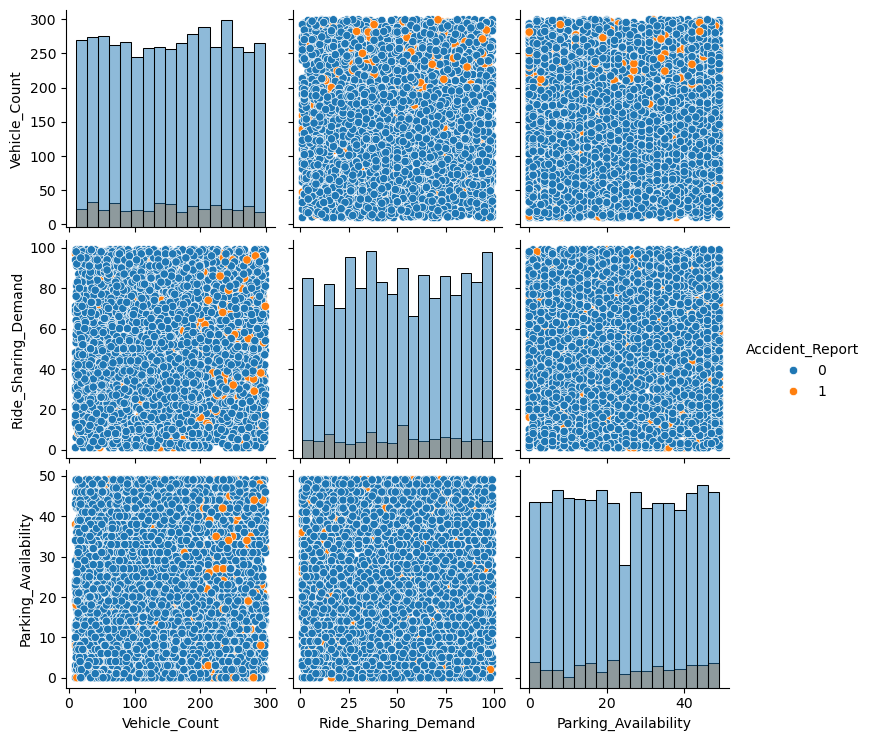

In [42]:
sns.pairplot(data=df, hue='Accident_Report', diag_kind='hist', palette='tab10')

<Axes: xlabel='Traffic_Speed_kmh', ylabel='Parking_Availability'>

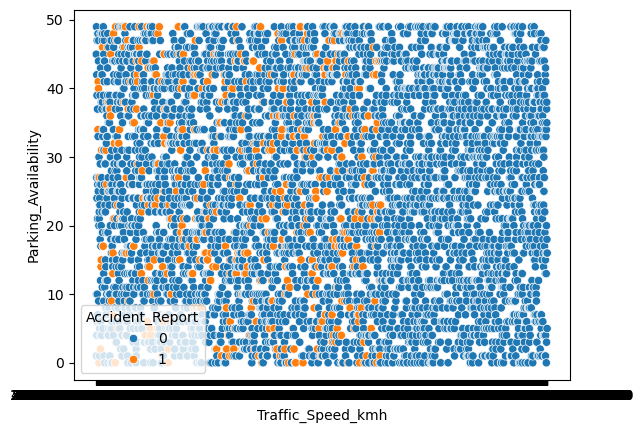

In [37]:
sns.scatterplot(x='Traffic_Speed_kmh',
                y='Parking_Availability',
                data=df,
                hue='Accident_Report')

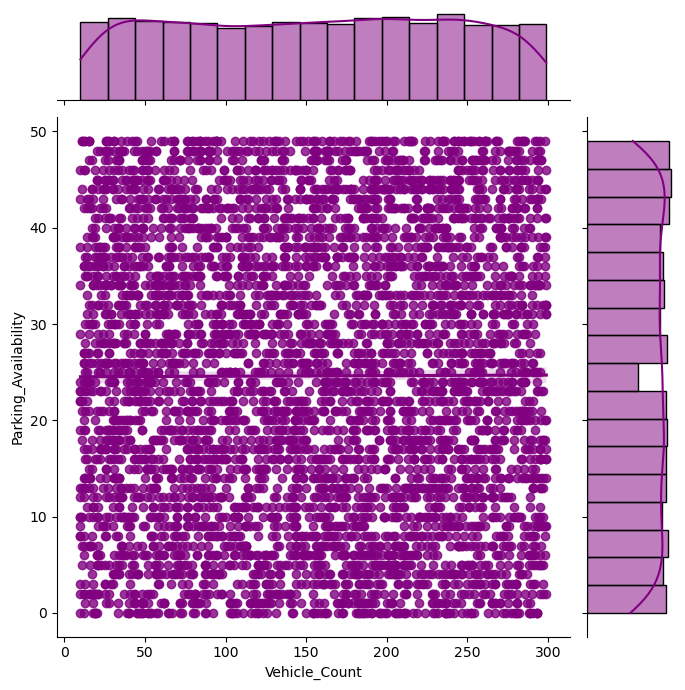

In [36]:
sns.jointplot(x='Vehicle_Count',
                y='Parking_Availability',
                data=df,
                kind='reg',
                color='purple',
                height=7)

<Axes: >

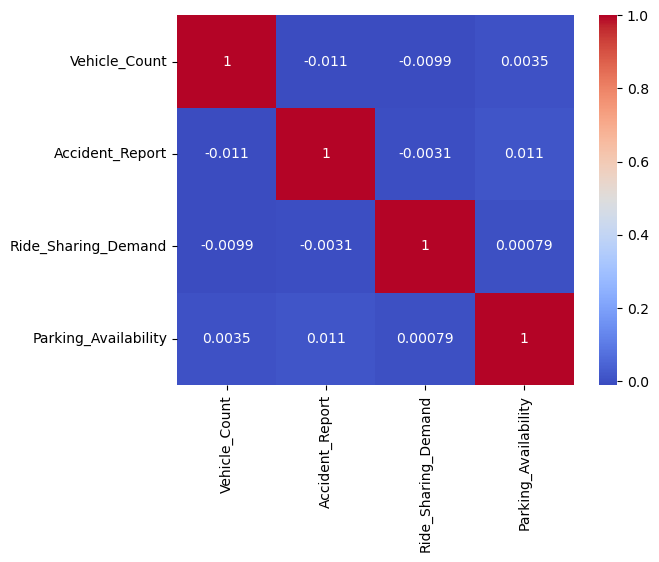

In [44]:
numdf = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numdf.corr(method="pearson"), cmap='coolwarm', annot=True)